<a href="https://colab.research.google.com/github/waffers101/Sentiment-Analysis-of-Twitter-data-on-AI-based-home-assistant-products-using-Python/blob/main/Sentiment_analysis_on_twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****Sentiment Analysis of Twitter Data on AI Based Home Assistant Products using Python****

## Sentiment Analysis

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

## AI Based Home Assitant Products

AI assistant or AI virtual assistant or digital assistant is a program that understands voice commands. It utilizes Natural language processing to understand and perform tasks given by users in natural language. Companies are working on replacing every human task with a machine through automation.

##VADER
VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. IT uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. 

VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [ ]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import re
import random
import numpy as np
import collections

In [ ]:
#Making Dataframe from the tweets generated files 
#these files were collected byy livestreaming data for two weeks from twitter using tweepy library
df1 = pd.read_json('tweets2.json')
df2 = pd.read_json('tweets1.json')
df3 = pd.read_json('tweets3.json')
df4 = pd.read_json('tweets4.json')
df5 = pd.read_json('tweets5.json')
df6 = pd.read_json('tweets6.json')
df7 = pd.read_json('tweets7.json')
df8 = pd.read_json('tweets8.json')
df9 = pd.read_json('tweets9.json')
df10 = pd.read_json('tweets10.json')
df11 = pd.read_json('tweets11.json')
df12 = pd.read_json('tweets12.json')
df13 = pd.read_json('tweets13.json')
df14 = pd.read_json('tweets14.json')
df15 = pd.read_json('tweets15.json')
df16 = pd.read_json('tweets16.json')

In [ ]:
# concatenating the datasets into one
Final_Data = pd.concat([df1, df2, df3,df4, df5, df6,df7, df8, df9,df10, df11, df12,df13, df14, df15, df16])
print(Final_Data)
#Final_Data.info()

                   created_at                   id               id_str  \
0   2022-04-04 04:50:39+00:00  1510842258504892417  1510842258504892416   
1   2022-04-04 04:50:40+00:00  1510842264968654850  1510842264968654848   
2   2022-04-04 04:50:42+00:00  1510842270584807428  1510842270584807424   
3   2022-04-04 04:50:42+00:00  1510842272060870656  1510842272060870656   
4   2022-04-04 04:50:43+00:00  1510842274778804226  1510842274778804224   
..                        ...                  ...                  ...   
253 2022-04-10 05:12:16+00:00  1513022025421533184  1513022025421533184   
254 2022-04-10 05:12:16+00:00  1513022025786277888  1513022025786277888   
255 2022-04-10 05:12:17+00:00  1513022031629103104  1513022031629103104   
256 2022-04-10 05:12:21+00:00  1513022047408082944  1513022047408082944   
257 2022-04-10 05:12:26+00:00  1513022068954173444  1513022068954173440   

                                                  text  \
0    RT @jeo_ferocious: Alexa’s new IG st

In [ ]:
# Appending The two columns named text and extended_tweet in a new column named tweets_text
Final_Data = pd.concat([Final_Data, Final_Data["extended_tweet"].apply(pd.Series)], axis=1)
Final_Data["tweets_text"] = Final_Data["text"] + " " + Final_Data['full_text'].astype(str)

# examining the size and columns of the new dataset created
Final_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21065 entries, 0 to 257
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 21065 non-null  datetime64[ns, UTC]
 1   id                         21065 non-null  int64              
 2   id_str                     21065 non-null  int64              
 3   text                       21065 non-null  object             
 4   source                     21065 non-null  object             
 5   truncated                  21065 non-null  bool               
 6   in_reply_to_status_id      2751 non-null   float64            
 7   in_reply_to_status_id_str  2751 non-null   float64            
 8   in_reply_to_user_id        2928 non-null   float64            
 9   in_reply_to_user_id_str    2928 non-null   float64            
 10  in_reply_to_screen_name    2928 non-null   object             
 11  user

In [ ]:
# making a list of the values under the attribute "tweets_text"
tweet_list = Final_Data['tweets_text'].tolist()

In [ ]:
google_list = []
amazon_list = []
apple_list = []
unclassified = []

In [ ]:
# below snippet classifies the list formed above into four lists according to the keywords found in the tweets.

def word_in_text(word, text):
    word=word.lower()
    text=text.lower()
    match=re.search(word, text)
    if(match):
        return 1
    else:
        return 0

def tweet_classification(textoftweets):
    for text in textoftweets:
        if word_in_text('google', text)==1 or word_in_text('google assistant', text)==1 or word_in_text('google nest', text)==1:
            google_list.append(text)
        elif word_in_text('apple', text)==1 or word_in_text('siri', text)==1 or word_in_text('home pod', text)==1:
            apple_list.append(text)
        elif word_in_text('amazon', text)==1 or word_in_text('alexa', text)==1 or word_in_text('Amazon Echo', text)==1 or word_in_text('Echo', text)==1:
            amazon_list.append(text)
        else:
            unclassified.append(text)

tweet_classification(tweet_list)


In [ ]:
# importing vader for sentiment analysis
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as se

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.1 MB/s 


In [ ]:
# creating an object of the sentimentIntensityAnalyser class
sid = se()

# below snippet passes each string(tweet) in the list to the "polarity_score" function
# and append the result in a dataframe which is later returned by the funtions
def Sentiment_scores_df(tweetsarray,company_name):
    senti={}
    for tweet in tweetsarray:
         m=sid.polarity_scores(tweet)
         senti[tweet]=m
    df=pd.DataFrame.from_dict(senti,orient='index',columns=['neg','neu','pos','compound'])
    df['company']=company_name
    return df

# creating three dataframes for the three companies under consideration
Google=Sentiment_scores_df(google_list,'Google')
Amazon=Sentiment_scores_df(amazon_list,'Amazon')
Apple=Sentiment_scores_df(apple_list,'Apple')

In [ ]:
print(Google.iloc[78])

neg            0.0
neu          0.648
pos          0.352
compound     0.765
company     Google
Name: @GraniteBoyo6 we say please and thank you to google, siri, and alexa in this house lol nan, dtype: object


### Next we calculate some statistical mesures like mean and median on the "pos", "neg", "neu" and "compound" attributes of the dataframes formed above and compare them to analyse the results

In [ ]:
google_median_pos_score=Google['pos'].median()
print(google_median_pos_score)

amazon_median_pos_score=Amazon['pos'].median()
print(amazon_median_pos_score)


apple_median_pos_score=Apple['pos'].median()
print(apple_median_pos_score)

0.049
0.1145
0.0


In [ ]:
apple_mean_pos_score=Apple['pos'].mean()
print(apple_mean_pos_score)

google_mean_pos_score=Google['pos'].mean()
print(google_mean_pos_score)

amazon_mean_pos_score=Amazon['pos'].mean()
print(amazon_mean_pos_score)


0.08608367933567546
0.07514127423822706
0.14377128659682994


In [ ]:
apple_mean_compound_score=Apple['compound'].mean()
print(apple_mean_compound_score)


google_mean_compound_score=Google['compound'].mean()
print(google_mean_compound_score)


amazon_mean_compound_score=Amazon['compound'].mean()
print(amazon_mean_compound_score)


0.11430833599488961
0.23315373961218866
0.25039063926940225


In [ ]:
apple_median_compound_score=Apple['compound'].median()
print(apple_median_compound_score)


google_median_compound_score=Google['compound'].median()
print(google_median_compound_score)


amazon_median_compound_score=Amazon['compound'].median()
print(amazon_median_compound_score)


0.0
0.14055
0.2023


In [ ]:
amazon_median_neg_score=Amazon['neg'].median()
print(amazon_median_neg_score)


apple_median_neg_score=Apple['neg'].median()
print(apple_median_neg_score)

google_median_neg_score=Google['neg'].median()
print(google_median_neg_score)


0.0
0.0
0.0


In [ ]:
amazon_mean_neg_score=Amazon['neg'].mean()
print(amazon_mean_neg_score)


apple_mean_neg_score=Apple['neg'].mean()
print(apple_mean_neg_score)


google_mean_neg_score=Google['neg'].mean()
print(google_mean_neg_score)



0.039024845554660265
0.03924369211114652
0.019662049861495848


In [ ]:
amazon_median_neu_score=Amazon['neu'].median()
print(amazon_median_neu_score)


apple_median_neu_score=Apple['neu'].median()
print(apple_median_neu_score)


google_median_neu_score=Google['neu'].median()
print(google_median_neu_score)


0.834
1.0
0.93


In [ ]:
amazon_mean_neu_score=Amazon['neu'].mean()
print(amazon_mean_neu_score)


apple_mean_neu_score=Apple['neu'].mean()
print(apple_mean_neu_score)


google_mean_neu_score=Google['neu'].mean()
print(google_mean_neu_score)


0.8172045393499834
0.8746748642606186
0.9051939058171742


### Next we plot graphs to easily understand the comaprison of the score assinged to tweets by our sentiment analyzer

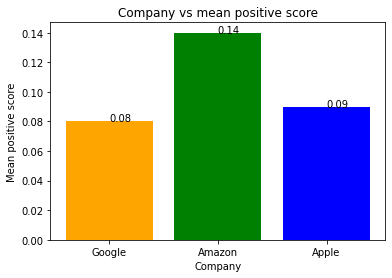

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
company_xaxis=['Google','Amazon','Apple']
mean_pos_yaxis=[round(google_mean_pos_score,2),round(amazon_mean_pos_score,2),round(apple_mean_pos_score,2)]
plt.bar(company_xaxis,mean_pos_yaxis,color=['orange','green','blue'])
addlabels(company_xaxis,mean_pos_yaxis)
plt.title('Company vs mean positive score')
plt.xlabel('Company')
plt.ylabel('Mean positive score')
plt.show()


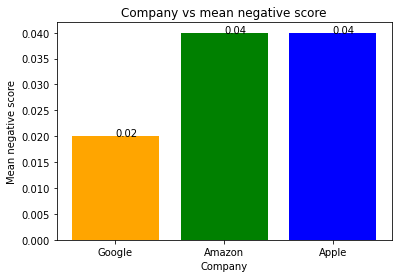

In [ ]:
mean_neg_yaxis=[round(google_mean_neg_score,2),round(amazon_mean_neg_score,2),round(apple_mean_neg_score,2)]
plt.bar(company_xaxis,mean_neg_yaxis,color=['orange','green','blue'])
addlabels(company_xaxis,mean_neg_yaxis)
plt.title('Company vs mean negative score')
plt.xlabel('Company')
plt.ylabel('Mean negative score')
plt.show()

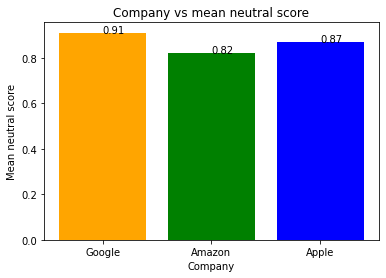

In [ ]:
mean_neu_yaxis=[round(google_mean_neu_score,2),round(amazon_mean_neu_score,2),round(apple_mean_neu_score,2)]
plt.bar(company_xaxis,mean_neu_yaxis,color=['orange','green','blue'])
addlabels(company_xaxis,mean_neu_yaxis)
plt.title('Company vs mean neutral score')
plt.xlabel('Company')
plt.ylabel('Mean neutral score')
plt.show()


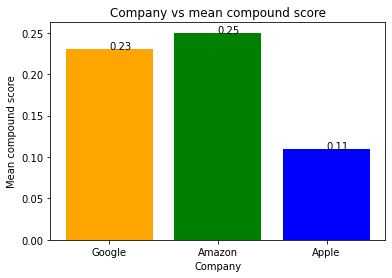

In [ ]:
mean_compound_yaxis=[round(google_mean_compound_score,2),round(amazon_mean_compound_score,2),round(apple_mean_compound_score,2)]
plt.bar(company_xaxis,mean_compound_yaxis,color=['orange','green','blue'])
addlabels(company_xaxis,mean_compound_yaxis)
plt.title('Company vs mean compound score')
plt.xlabel('Company')
plt.ylabel('Mean compound score')
plt.show()



### Next we plot the number of tweets against the country name from where tweets were posted. This analysis gives us a rough idea of in which country these products are most popular. Later we plot top 5 countries as well

Please note that the total number of tweets with the place information is under 150. That is, not all 21000 tweets have the place information. So the accuracy of this analysis is limited.

Counter({'United States': 58, 'United Kingdom': 24, 'Brasil': 16, 'India': 6, 'Malaysia': 4, 'España': 3, 'México': 3, 'Canada': 3, 'Australia': 3, 'Taiwan': 2, 'Tanzania': 2, 'Venezuela': 2, 'Republic of the Philippines': 2, 'Kenya': 2, '日本': 2, 'Italia': 2, 'France': 2, 'Nederland': 1, 'Francia': 1, 'Türkiye': 1, 'Germany': 1, 'Ukraine': 1, 'Czech Republic': 1, 'ישראל': 1, 'Deutschland': 1, 'Espanya': 1, 'Brazil': 1, 'Paraguay': 1, 'Colombia': 1, 'Spain': 1, 'Costa Rica': 1, 'Portugal': 1, 'Argentina': 1, 'Indonesia': 1, 'Sweden': 1, 'Česká republika': 1, 'Suomi': 1})


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0, flags=flags)


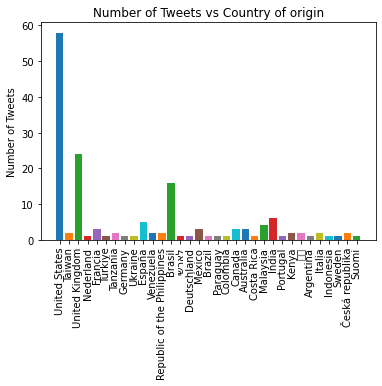

In [ ]:
# removing df7 as because of a technical glitch while
# collecting data the values of place variable in it are all blank and not in right format
# they are all nan which is distrupting the entire process of plotting below
# graph when combined with rest 15 dataframes.

# creating new final data with no df7
Final_Data_New = Final_Data = pd.concat([df1, df2, df3,df4, df5, df6, df8, df9,df10, df11, df12,df13, df14, df15, df16])
Place_list=Final_Data_New['place'].tolist()
res = list(filter(None, Place_list))
# print(res)
# print(type(res[0]))
# print(len(res))
#Place_list
#print(res[0]['country'])

country_list = []

for place in res:
  # print(type(place))
  country_list.append(place['country'])

counter = collections.Counter(country_list)
print(counter)


# merging the counts for those countries which occur more than once in the dataset with different spellings
counter['España']=counter['España'] + counter['Spain']
counter['España']=counter['España'] + counter['Espanya']
# print(counter['Espanya'])
del counter['Spain']
del counter['Espanya']
counter['Francia']=counter['Francia'] + counter['France']
del counter['France']
# print(counter['Francia'])
# Česká republika
counter['Česká republika']=counter['Česká republika'] + counter['Czech Republic']
del counter['Czech Republic']
# print(counter['Francia'])

# next two lines are for giving different bars different colours
cmap = plt.cm.tab10
colors = cmap(np.arange(len(counter)) % cmap.N)

plt.xticks(rotation='vertical')
plt.bar(counter.keys(), counter.values(), color=colors)
plt.title("Number of Tweets vs Country of origin")
plt.ylabel('Number of Tweets')
plt.show()


United States  : 58  
United Kingdom  : 24  
Brasil  : 16  
India  : 6  
España  : 5  
<class 'tuple'>
{'United States': 58, 'United Kingdom': 24, 'Brasil': 16, 'India': 6, 'España': 5}


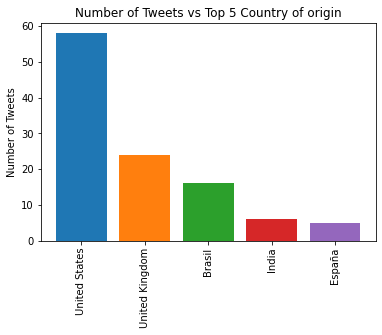

In [ ]:
# Plotting top 5 countries

top5 = counter.most_common(5)
for i in top5:
  print(i[0]," :",i[1]," ")

# for converting a list of tuples into dictionay
def Convert(tup, di):
  di = dict(tup)
  return di

Top5Dict= {}
Top5Dict=Convert(top5,Top5Dict)

print(type(top5[0]))
print(Top5Dict)

cmap = plt.cm.tab10
colors = cmap(np.arange(len(Top5Dict)) % cmap.N)
plt.xticks(rotation='vertical')
plt.bar(Top5Dict.keys(), Top5Dict.values(), color=colors)
# addlabels(Top5Dict.keys(),Top5Dict.values())
plt.title("Number of Tweets vs Top 5 Country of origin")
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

a = 'This was a good movie.'
print(sid.polarity_scores(a))

a = 'This was the best, most awesome movie EVER MADE!!!'
print(sid.polarity_scores(a))

a= 'I hate the feeling of loneliness'
print(sid.polarity_scores(a))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}
{'neg': 0.65, 'neu': 0.2, 'pos': 0.15, 'compound': -0.7184}


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
